### Goal

In this chapter,

We will understand the basics of FAST algorithm
We will find corners using OpenCV functionalities for FAST algorithm.


### Theory

We saw several feature detectors and many of them are really good. But when looking from a real-time application point of view, they are not fast enough. One best example would be SLAM (Simultaneous Localization and Mapping) mobile robot which have limited computational resources.

As a solution to this, FAST (Features from Accelerated Segment Test) algorithm was proposed by Edward Rosten and Tom Drummond in their paper "Machine learning for high-speed corner detection" in 2006 (Later revised it in 2010). A basic summary of the algorithm is presented below. Refer original paper for more details 

Source: https://www.researchgate.net/publication/223831601_Fast_Corner_Detection

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

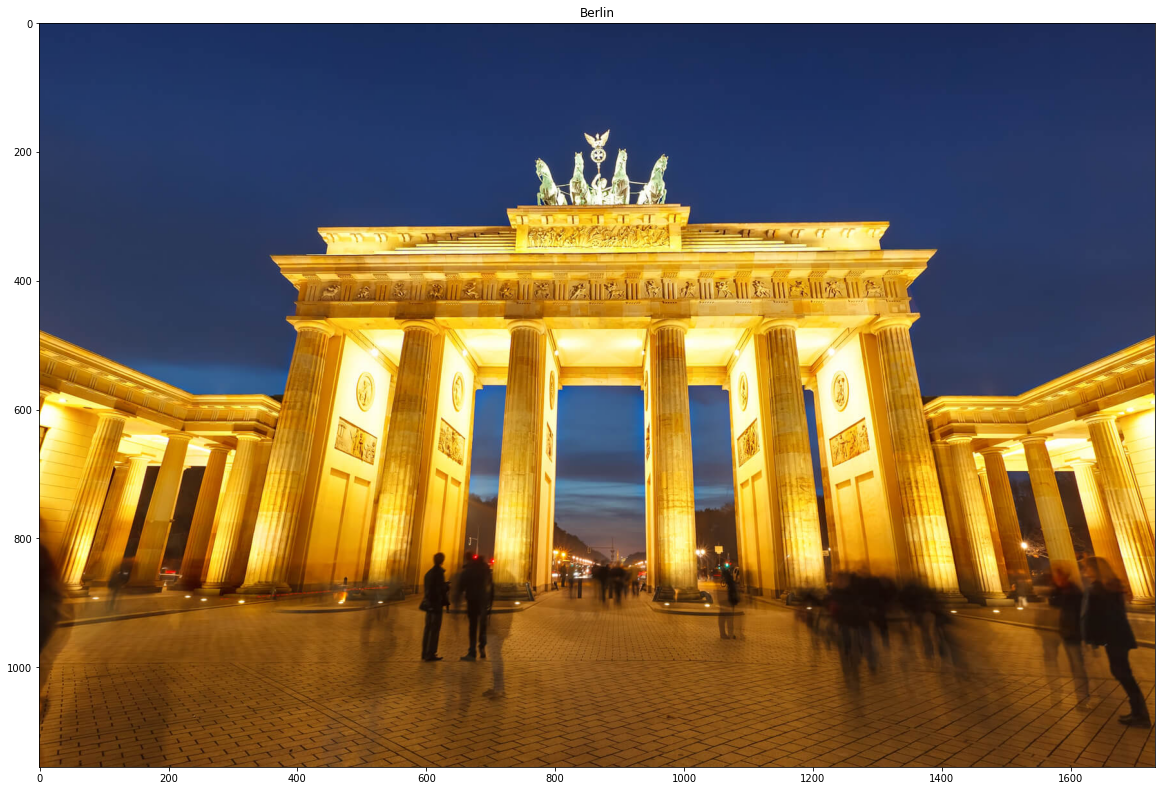

In [3]:
image = cv2.imread('../images/berlin.jpg')
#Next line is just for arranging the figure size
#Image size is extended to highlight the keypoints
plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Berlin')
plt.show()

In [8]:
#Converting our pixels in to gray values
gray= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

#### FAST Feature Detector in OpenCV

It is called as any other feature detector in OpenCV. If you want, you can specify the threshold, whether non-maximum suppression to be applied or not, the neighborhood to be used etc.

For the neighborhood, three flags are defined:


- cv2.FAST_FEATURE_DETECTOR_TYPE_5_8
- cv2.FAST_FEATURE_DETECTOR_TYPE_7_12
- cv2.FAST_FEATURE_DETECTOR_TYPE_9_16 

Below is a simple code on how to detect and draw the FAST feature points.

In [10]:
# Initiate FAST object with default values
fast = cv2.FastFeatureDetector_create()

# find and draw the keypoints
kp = fast.detect(image,None)
img = cv2.drawKeypoints(image, kp, None, color=(255,0,0))

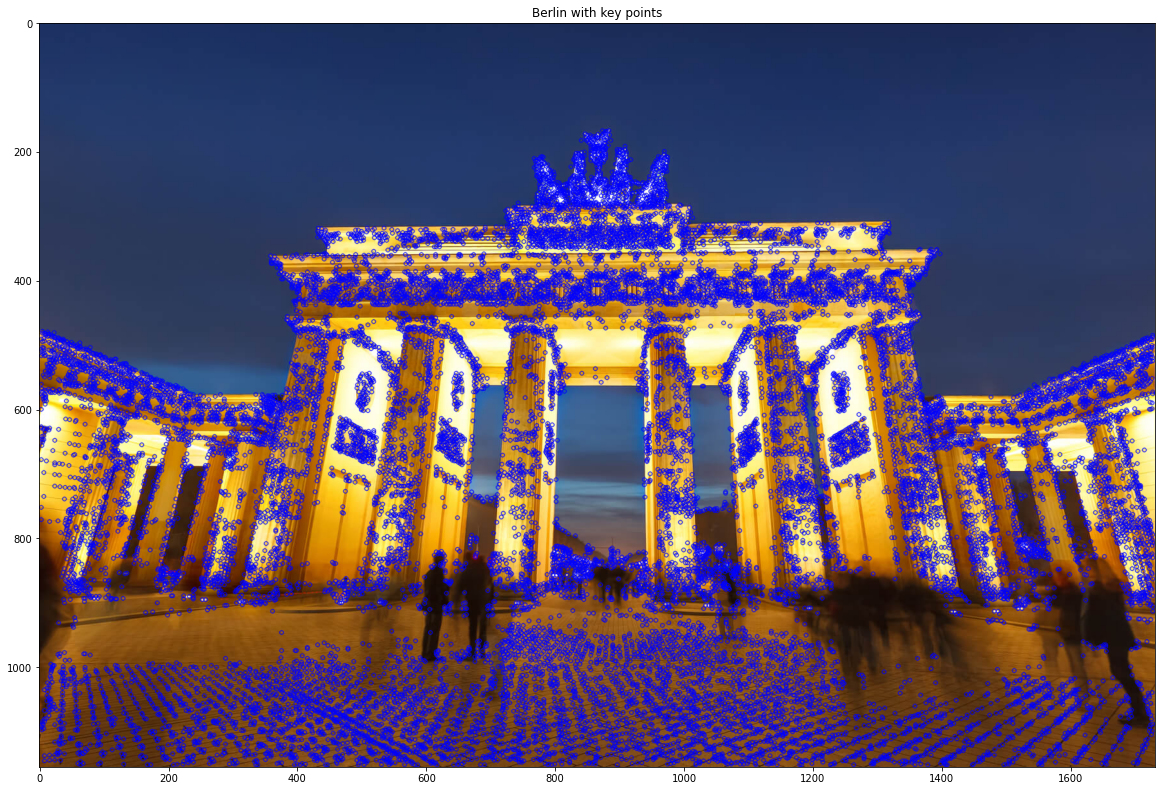

In [9]:
plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Berlin with key points')
plt.show()

In [11]:
# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )
print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )

Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 21326


In [12]:
# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(img,None)
print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )

Total Keypoints without nonmaxSuppression: 196932
